# K-Means Clustering
## Problem 1,2

In [1]:
## Loading data
from jupyterthemes import jtplot

jtplot.style(context='notebook',ticks=True, grid=True, figsize=(6,4.5),gridlines='--')
jtplot.reset()
import hickle as hkl
import sys
from joblib import dump, load
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

data = hkl.load('dataset_2001.hkl')  #pre-saved data loading

# Function to find squared Euclidean distance between two points
def euclid_dist(X,Y):
    dist = (X[0,0] - Y[0,0])**2 + (X[0,1] - Y[0,1])**2
    return dist

# Function for mean squared error (dividing n is just an extra factor)
def findMSE(prediction, data_points, cluster_centers):
    error = 0
    for i in range(len(data_points)):
        error = error + euclid_dist(data_points[i,:].reshape(1,2),cluster_centers[prediction[i],:].reshape(1,2))
    return error


# Function to generate one-hot encoding of the KMeans Clustering algorithm
def oh_encode(prediction, n_cluster):
    one_hot_result = np.zeros((len(prediction),n_cluster))
    for i in range(len(prediction)):
        one_hot_result[i,prediction[i]]=1
    return one_hot_result



In [82]:
# K-Means; K=2,3,4,5,6
coords = data['coords']
num_clusters = [2,3,4,5,6] 
mse = np.zeros((len(num_clusters)))
for i, j in enumerate(num_clusters,0):
    # init = 'random', 'k-means++', or an array of initial centroids
    init_centers = np.array([[coords[10,0],coords[10,1]],
                             [coords[122,0],coords[122,1]],
                             [coords[92,0],coords[92,1]],
                             [coords[132,0],coords[132,1]]
                            ])
    model_save_path = './saved_models/kmpp_num_cluster_' + str(j) + '.joblib'
    smallest_MSE = sys.maxsize
    for iteration in  range(50):  #loop for selecting model with smallest MSE
        kmeans = KMeans(init = 'k-means++', n_init = 1, n_clusters=j).fit(coords)
        if kmeans.inertia_ < smallest_MSE:
            smallest_MSE = kmeans.inertia_
            dump(kmeans,model_save_path)
    kmeans = load(model_save_path)
    clusters = kmeans.labels_
    #kmeans.cluster_centers_  #cluster centres m_k
    
    # Statistics
    MSE = findMSE(kmeans.labels_, coords, kmeans.cluster_centers_)
    mse[i] = MSE
    one_hot_labels = oh_encode(kmeans.labels_,j) #matrix of a_i
    
    #print(f'Mean Squared Error: {MSE}')
    #print(f'No.of iterations: {kmeans.n_iter_}')
    #print(kmeans.inertia_)
    # Plots
    plt_color = ['r','b','k','y','g','c']
    k=0
    #plt.title(f"K = {j}")
    for i in np.unique(clusters):
        indx = np.where(clusters==i)[0]
        #plt.scatter(coords[indx,0],coords[indx,1],c=plt_color[k])
        k = k+1
    #plt.grid()
    #plt.figure(figsize=(15, 15))
    #plt.savefig(f"./plots/kmpp_clustering_K_{j}.eps",dpi=300)
    #plt.show()
 

# Plotting variation of delta^2 with K
#plt.plot(num_clusters, mse,'-')
#plt.xlabel('Number of clusters (K)')
#plt.ylabel('MSE')
#plt.title('Variation of MSE with K')
#plt.grid()
#plt.show()    

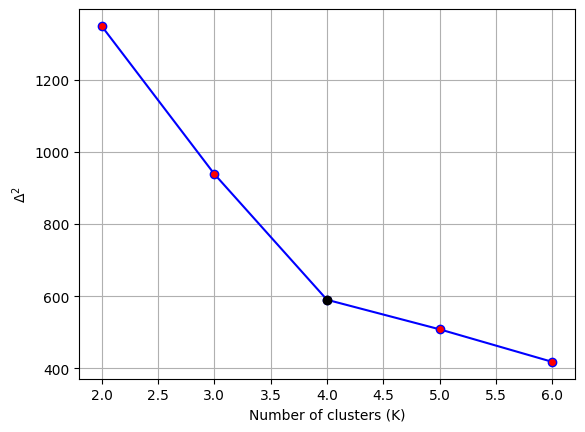

In [12]:

from matplotlib import rc
plt.plot(num_clusters, mse,'-',marker='o', markerfacecolor = 'r', color='blue')
plt.plot(4,mse[2],'ko') 
plt.xlabel('Number of clusters (K)')
plt.ylabel(r'$\Delta^2$')
#plt.title('Variation of MSE with K')
plt.grid()
#plt.savefig('./graphs/kmpp_distortion_KMeans.eps',dpi=300)
plt.show()


In [13]:
# Finding elbow of the curve

max_der = -1*sys.maxsize
for i in range(1,len(mse.T)-1):
    second_der = mse[i+1] + mse[i-1] -2*mse[i]
    if second_der > max_der:
        max_der = second_der
        best_K = i+2
print(best_K)

4


In [86]:
# finding no.of components of each class (part b)  for 4xK table
true_labels = data['oh_label']
inputvar = data['coords']
#true_labels = one_hot_labels 
cnt = np.zeros((6,1))
#kmeans.predict(inputvar[i,:].reshape(1,2))
for i in range(len(true_labels)):
    comp_arr = np.array([0])
    label_arr = np.array([[1],[0],[0],[0]])
    if np.array_equal(kmeans.predict(inputvar[i,:].reshape(1,2)),comp_arr) and np.array_equal(true_labels[i,:].reshape(4,1),label_arr):
        cnt[0,0] = cnt[0,0] + 1
    
    comp_arr = np.array([1])
    if np.array_equal(kmeans.predict(inputvar[i,:].reshape(1,2)),comp_arr) and np.array_equal(true_labels[i,:].reshape(4,1),label_arr):
        cnt[1,0] = cnt[1,0] + 1
    
    comp_arr = np.array([2])
    if np.array_equal(kmeans.predict(inputvar[i,:].reshape(1,2)),comp_arr) and np.array_equal(true_labels[i,:].reshape(4,1),label_arr):
        cnt[2,0] = cnt[2,0] + 1
    
    comp_arr = np.array([3])
    if np.array_equal(kmeans.predict(inputvar[i,:].reshape(1,2)),comp_arr) and np.array_equal(true_labels[i,:].reshape(4,1),label_arr):
        cnt[3,0] = cnt[3,0] + 1
        
    comp_arr = np.array([4])
    if np.array_equal(kmeans.predict(inputvar[i,:].reshape(1,2)),comp_arr) and np.array_equal(true_labels[i,:].reshape(4,1),label_arr):
        cnt[4,0] = cnt[4,0] + 1
        
    comp_arr = np.array([5])
    if np.array_equal(kmeans.predict(inputvar[i,:].reshape(1,2)),comp_arr) and np.array_equal(true_labels[i,:].reshape(4,1),label_arr):
        cnt[5,0] = cnt[5,0] + 1
        
    
    
total_pts= np.array([77,23,63,37])    
cnt/total_pts[0]

array([[0.40540541],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.13513514],
       [0.45945946]])

NameError: name 'plt' is not defined

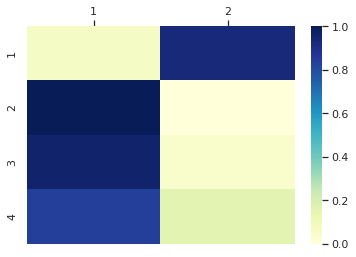

In [1]:
# HEAT MAP

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.array([[0.07,0.93],
                        [1,0],
                        [0.96,0.04],
                        [0.84,0.16]])
ax = sns.heatmap(uniform_data,xticklabels=[1,2],yticklabels=[1,2,3,4],cmap="YlGnBu")
ax.xaxis.tick_top()
#plt.savefig('./graphs/kmpp_heatmap_kmeans_2.jpeg',dpi=300)
plt.show()

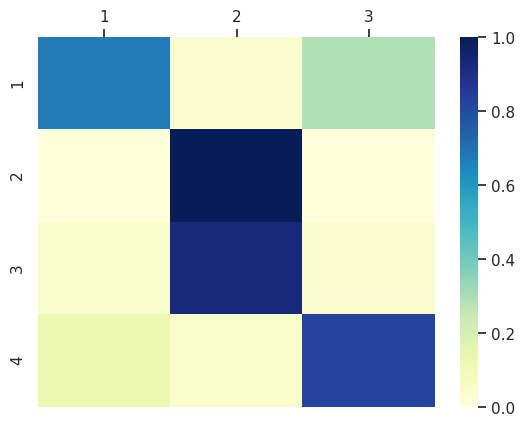

In [67]:
uniform_data = np.array([[0.68,0.03,0.29],
                        [0,1,0],
                        [0.04,0.93, 0.03],
                        [0.13,0.04, 0.83]])
ax = sns.heatmap(uniform_data,xticklabels=[1,2,3],yticklabels=[1,2,3,4],cmap="YlGnBu")
ax.xaxis.tick_top()
plt.savefig('./graphs/kmpp_heatmap_kmeans_3.eps',dpi=300)
plt.show()

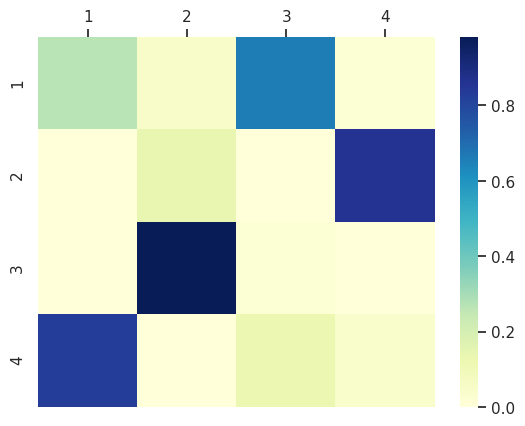

In [76]:
uniform_data = np.array([[0.27,0.05,0.66, 0.02],
                        [0,0.14,0,0.86],
                        [0,0.98, 0.02, 0],
                        [0.83,0, 0.13, 0.04]])
ax = sns.heatmap(uniform_data,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4],cmap="YlGnBu")
ax.xaxis.tick_top()
plt.savefig('./graphs/kmpp_heatmap_kmeans_4.eps',dpi=300)
plt.show()

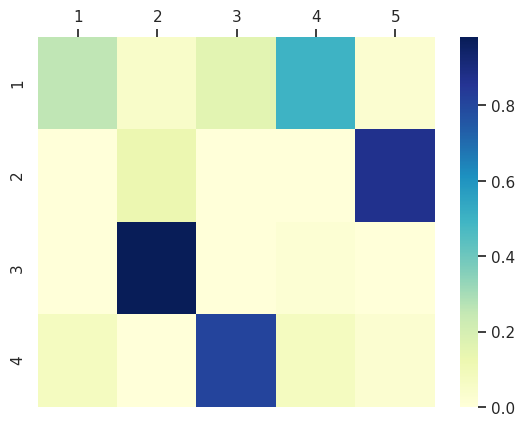

In [87]:
uniform_data = np.array([[0.26,0.05,0.16,0.50,0.03],
                        [0,0.13,0,0,0.87],
                        [0,0.98,0,0.02,0],
                        [0.08,0,0.81,0.08,0.03]])
ax = sns.heatmap(uniform_data,xticklabels=[1,2,3,4,5],yticklabels=[1,2,3,4],cmap="YlGnBu")
ax.xaxis.tick_top()
plt.savefig('./graphs/kmpp_heatmap_kmeans_5.eps',dpi=300)
plt.show()

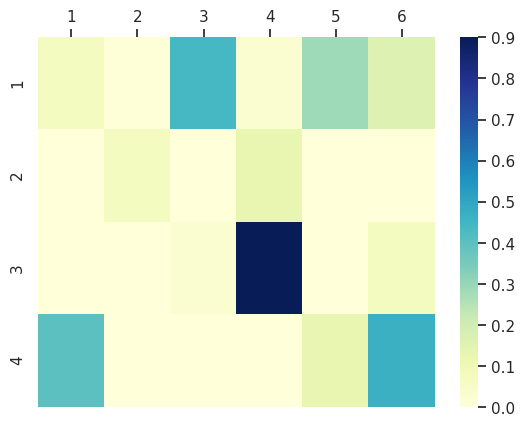

In [89]:
uniform_data = np.array([[0.07,0.01,0.44,0.03,0.29,0.16],
                        [0,0.07,0,0.13,0,0],
                        [0,0,0.03,0.9,0,0.07],
                        [0.4,0,0,0,0.13,0.47]])
ax = sns.heatmap(uniform_data,xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4],cmap="YlGnBu")
ax.xaxis.tick_top()
plt.savefig('./graphs/kmpp_heatmap_kmeans_6.eps',dpi=300)
plt.show()

In [53]:
kmeans.predict([[0,2.5]])

(1,)

## Problem 3

In [114]:
# EM Algorithm on generated (same) dataset
from sklearn.mixture import GaussianMixture

points = data['coords']
true_labels = data['oh_label']
gm = GaussianMixture(n_components = 4).fit(points)
sample_num = np.random.randint(0,201)  # randomly choosing a datapoint # [0,200]
print('Posterior probabilites of each class given data pt.: ',gm.predict_proba(points[sample_num,:].reshape(1,2)))   # prediction from learned clusters
print('Ground Truth (one-hot label):',true_labels[sample_num,:])                             # ground-truth


Posterior probabilites of each class given data pt.:  [[6.34480170e-02 1.61179024e-04 1.39300928e-22 9.36390804e-01]]
Ground Truth (one-hot label): [1. 0. 0. 0.]


In [128]:
# finding no.of components of each class for 4xK table

#true_labels = one_hot_labels 
cnt = np.zeros((6,1))
total_posterior = np.zeros((1,4))
category_cnt = 0
for i in range(len(points)):
    label_arr = np.array([[0],[0],[0],[1]])
    if np.array_equal(true_labels[i,:].reshape(4,1),label_arr):
        total_posterior = total_posterior + gm.predict_proba(points[i,:].reshape(1,2))
        category_cnt = category_cnt + 1
 
total_posterior= total_posterior/category_cnt
print(total_posterior)
print(np.sum(total_posterior))

[[9.32948110e-03 7.94716128e-01 5.24691509e-06 1.95949144e-01]]
1.0


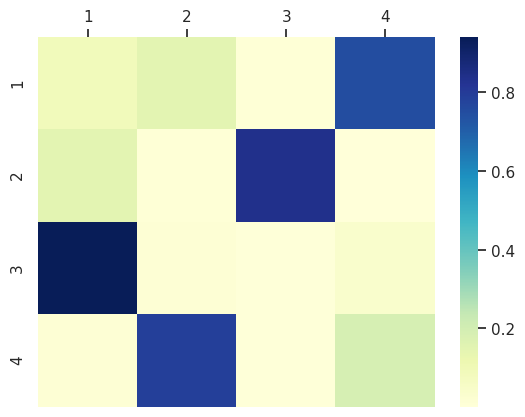

In [129]:
uniform_data = np.array([[0.09,0.15,0.01,0.75],
                        [0.15,0.0099,0.84,0.0001],
                        [0.94,0.015,0.005,0.04],
                        [0.015,0.79,0.005,0.19]])
ax = sns.heatmap(uniform_data,xticklabels=[1,2,3,4],yticklabels=[1,2,3,4],cmap="YlGnBu")
ax.xaxis.tick_top()
plt.savefig('./graphs/em_heatmap_kmeans_4.eps',dpi=300)
plt.show()